# Group Data Generation Example
For the group data generation, the probability to have a true positive label is dependant on the previous predictions of the whole group sharing the protecetd attribute. The whole group moves towards positive cluster depending on the sum of positive predictions for the whole group. 

In [1]:
import sys
import numpy as np
sys.path.append("../")

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC

from long_term_fairness.ltf_plot import LongTermFairnessPlot
from long_term_fairness.ltf_data.group_data_generator import GroupDataGenerator
from long_term_fairness.ltf_aif.longterm_aif import AifLongTermMetric, AifLongTermPrediction

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# The generator.
generator = GroupDataGenerator(mean_pos=[0, 1],
                               mean_neg=[12, 11],
                               num_positive_label=100,
                               num_negative_label=100,
                               discrimination_factor=.9)

In [4]:
# The helper class is necessary to use sklearn with the ltf framework.
class CLF:
    def __init__(self, clf=LogisticRegression()):
        self.c = clf
    def predict(self, X, X_s):
        return self.c.predict(X)
    def fit(self, X, X_s, y):
        self.c.fit(X, y)     

## 1. Unconstrained Example
The first example is unconstrained again. Results are the same as before (except that the learned decision boundary is closer to the real boundary, because a linear support vector machine is trained as baseline model).

The initial proportions in the true data remain constant over all generations and all individuals are positive labeled in the baseline pipeline.

In [23]:
# The long term metric with default options (disparate impact and accuracy).
metric = AifLongTermMetric()

In [24]:
# The clf, this time a linear support vector machine.
clf = CLF(LinearSVC())

In [25]:
# The plot generator.
l = LongTermFairnessPlot(generator, clf, metric.metric, x_lim=[-3, 14], y_lim=[-1, 14])

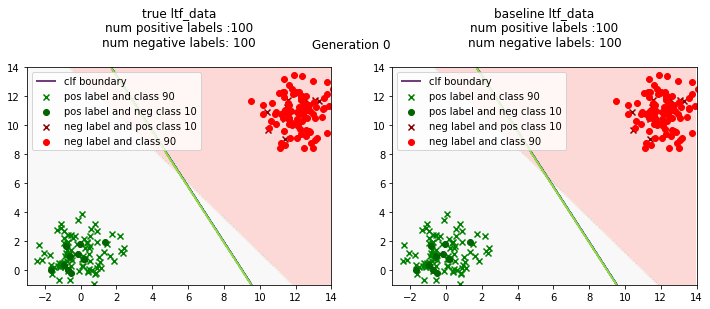

In [26]:
# Init the data and plot the first generation.
l.init_data()
l.plot_generation()

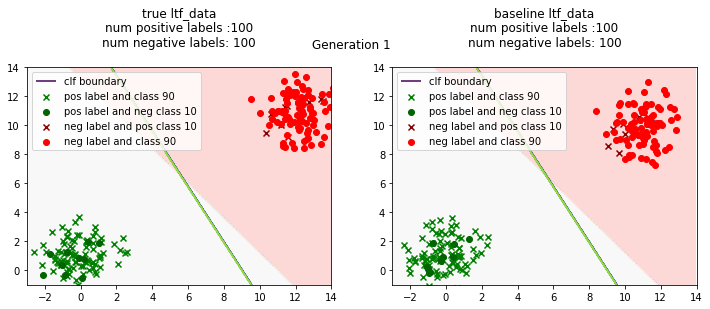

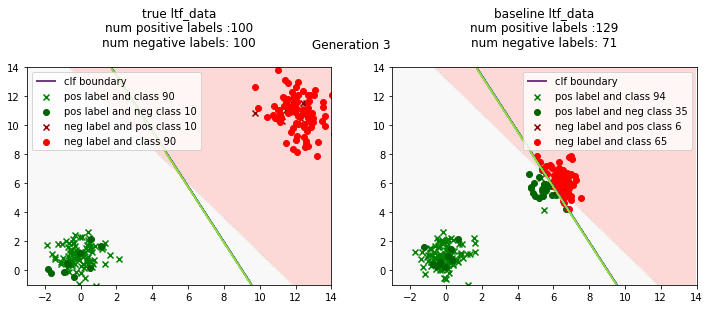

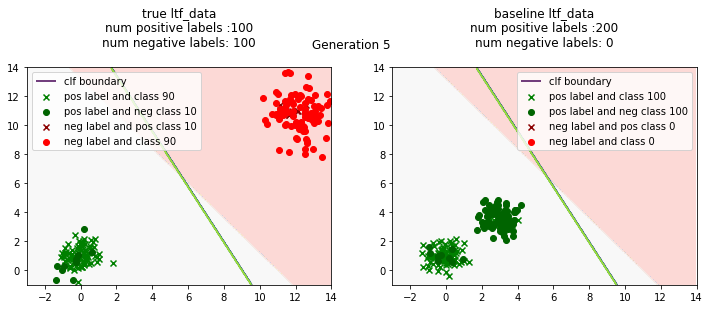

In [27]:
# Run six generations with clf updated after each step.
for i in range(6):

    l.run_generation()
    l.run_baseline_generation()
    if i % 2 == 0:
        l.plot_generation()

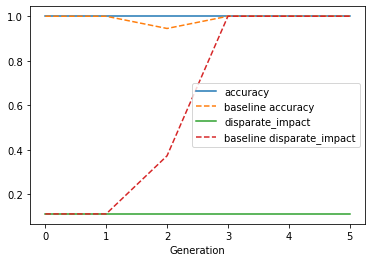

In [28]:
l.plot_ltf(metric._metrics)

The result is basically the same as in the previous section with the individual data generation, except that the accuracy decrease in the baseline pipeline is smaller now, due to the better decision function.

## 2. Constrained Example
The constrained example again uses decision rules removing disparate impact and mistreatment.

In [12]:
# The artificial fair clf.
clf = FairCLF()

In [13]:
# The ltf plot.
l = LongTermFairnessPlot(generator, clf, metric.metric, x_lim=[-3, 14], y_lim=[-1, 14])

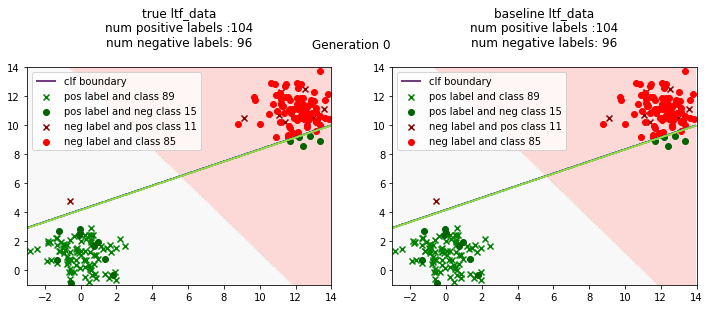

In [14]:
# Init and plot data.
l.init_data()
l.plot_generation()

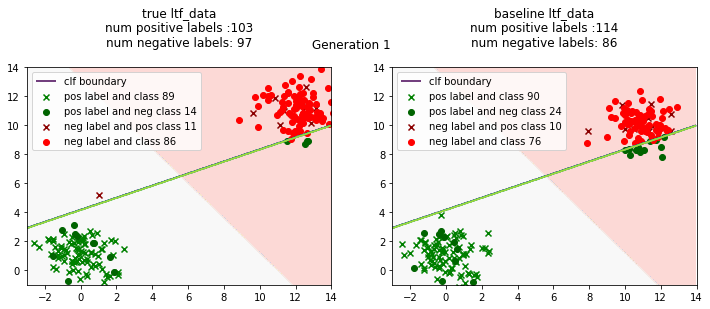

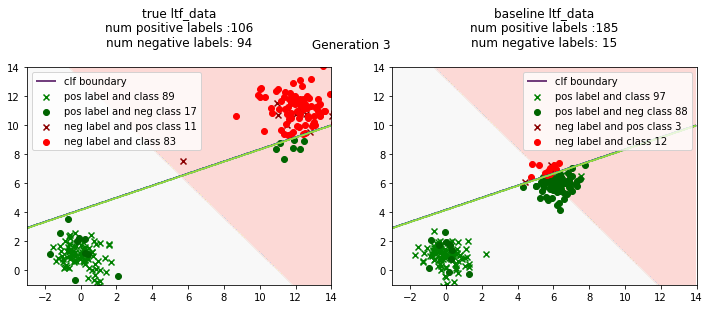

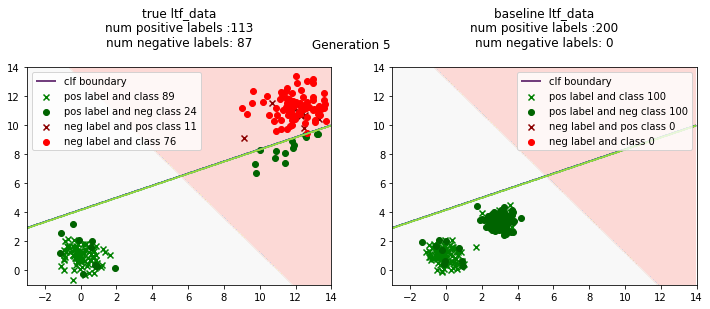

In [15]:
# Run six iterations.
for i in range(6):
    l.run_generation()
    l.run_baseline_generation()
    if i % 2 == 0:
        l.plot_generation()

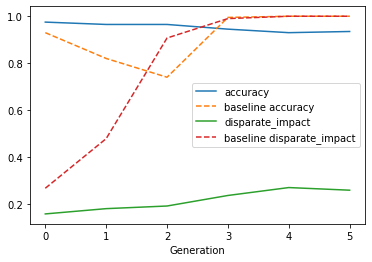

In [16]:
# Plot the results after 6 iterations.
l.plot_ltf(metric._metrics)

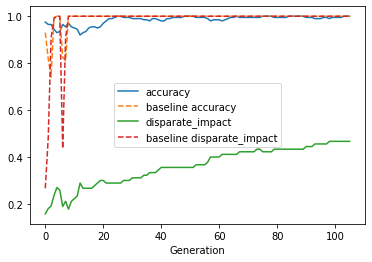

In [17]:
# Run another 100 iterations.
l.run(100)
l.plot_ltf(metric._metrics)

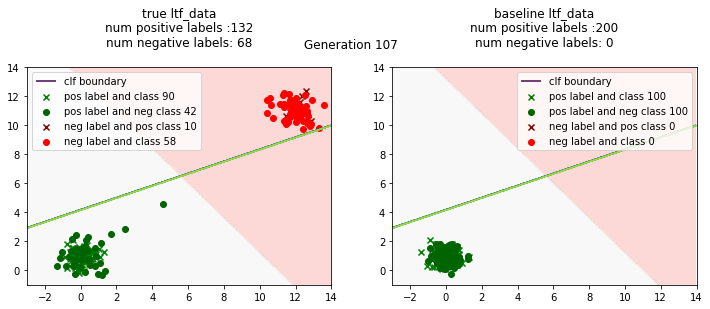

In [18]:
l.plot_generation()

### 3. Conclusion
Now, the all individuals benefit from positive decisions in the same way. Therefore, the whole group slowly moves towards the positive cluster, but it takes very long...

As improvement, individuals with positive label should move faster...